1. 

En este ejercicio vas a trabajar con un clasificador binario. Para ello utilizarás el dataset usuarios_win_mac_lin.csv. Elimina del dataframe todas las filas que se correspondan con la clase valor "1". Encontrarás datos de navegación de usuarios dentro de una web (paginas, duración...) y tendrás que predecir desde qué sistema operativo viene el usuario.

Realiza el ejercicio con el nuevo dataframe (eliminando los 1s):

- ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (toca, modifica, prueba) las variables y comenta si hay alguna de ellas que, modificándola, mejore el porcentaje de acierto del problema.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [1]:
# librerías
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

In [2]:
df = pd.read_csv('..\\..\\semana_20\\día_4\\usuarios_win_mac_lin.csv')
df.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB


In [4]:
df = df[df['clase'] != 1]
df

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


In [5]:
#Otra forma de eliminar las filas que tienen en la columna NO sean '1'
# df = df[~(df['clase'] == 1)]

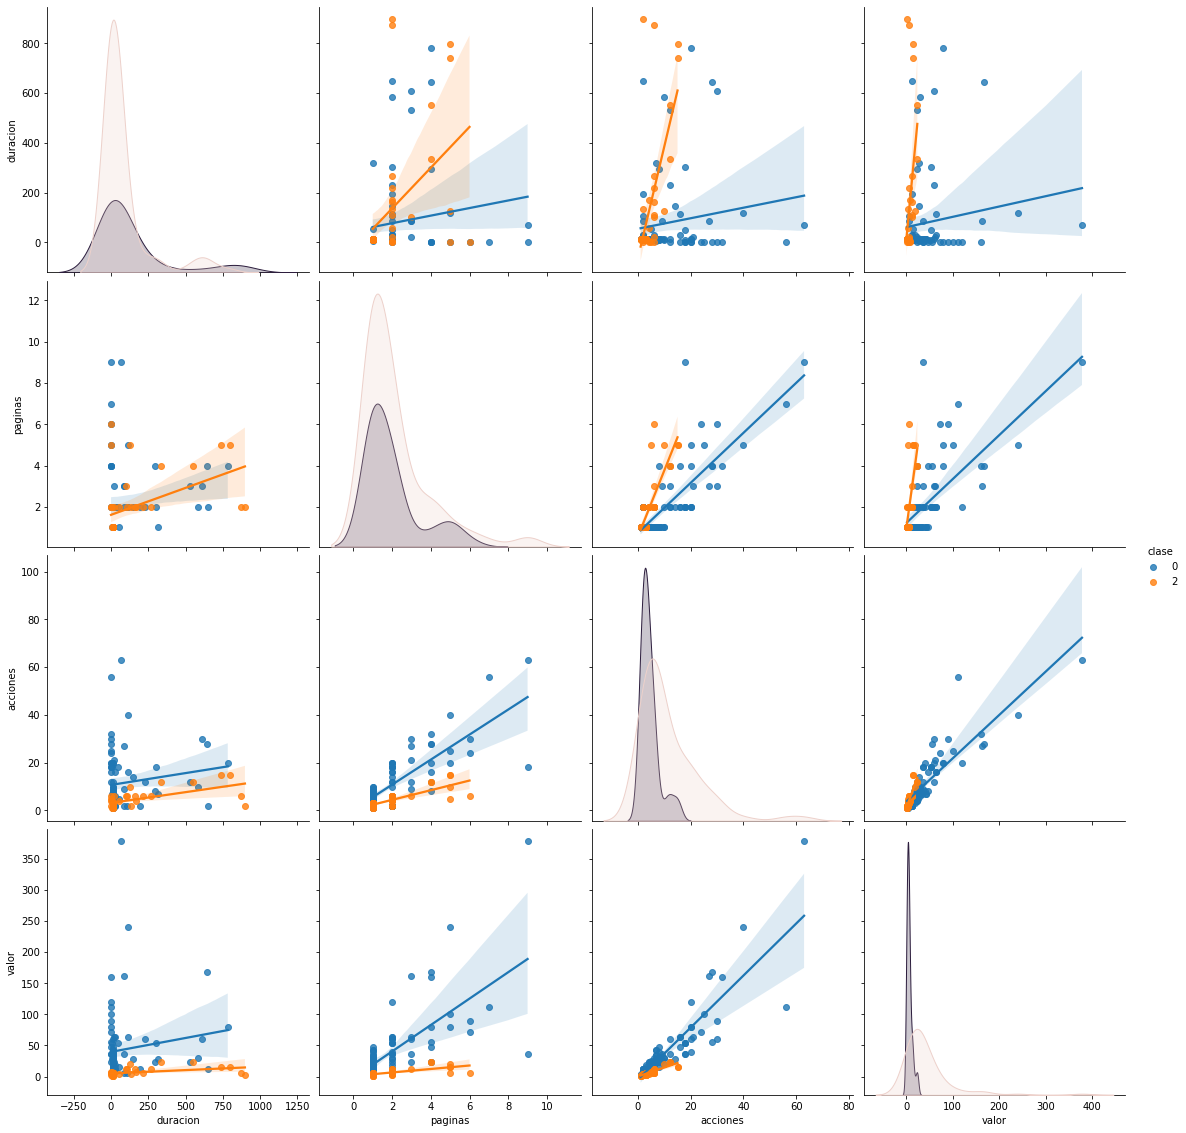

In [6]:
sns.pairplot(df.dropna(),
            hue='clase',
            height=4,
            vars=["duracion", "paginas","acciones","valor"],
            kind='reg'); # "reg" de regresión lineal

In [7]:
#define X and y==target
X = np.array(df.iloc[:,:-1])
y = np.array(df.iloc[:,-1])

In [8]:
df.groupby(['clase']).count() #No están muy balanceadas

,duracion,paginas,acciones,valor
clase,,,,
0,86,86,86,86
2,44,44,44,44


In [9]:
#Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20 , random_state = 42)


In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(104, 4)
(104,)
(26, 4)
(26,)


In [11]:

model = LogisticRegression(solver='liblinear', multi_class='auto')
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
predictions = model.predict(X_test)
predictions

array([0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2], dtype=int64)

In [13]:
predictions.tolist()

[0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2]

In [14]:
df_pred = pd.DataFrame({'clase': y_test,
                        'prediccion': predictions.tolist()})

df_pred['acierto'] = np.where(df_pred['clase'] == df_pred['prediccion'], True, False)
df_pred

,clase,prediccion,acierto
0,0,0,True
1,0,0,True
2,2,2,True
3,0,0,True
4,0,2,False
5,0,0,True
6,2,2,True
7,0,2,False
8,2,2,True
9,0,0,True


In [15]:
#Accuracy
accuracy = accuracy_score(y_test, predictions)
accuracy

0.8461538461538461

In [16]:
round(accuracy,3) #Porcentaje de acierto

0.846

In [17]:
c_matrix = confusion_matrix(y_test, predictions)
c_matrix

array([[13,  4],
       [ 0,  9]], dtype=int64)

<AxesSubplot:>

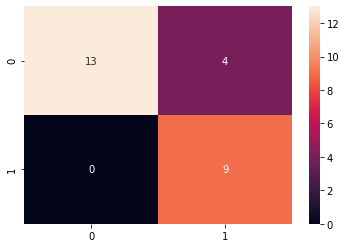

In [18]:
sns.heatmap(c_matrix, annot=True)

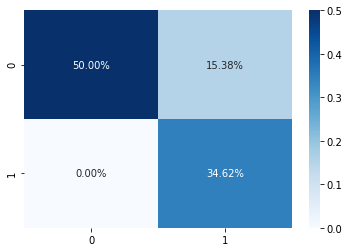

In [19]:
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, # sum suma todo
            fmt='.2%', cmap='Blues');

In [20]:
model.score(X_test,y_test) #métrica Accuracy sobre el modelo

0.8461538461538461

In [21]:
accuracy_score(y_test, predictions) #Cual es la metrica de lo que se predice

0.8461538461538461

In [22]:
model.classes_

array([0, 2], dtype=int64)

In [23]:
#Ahora jugaremos con los parametros del modelo para intentar ajustar mejor la metrica de acierto==> accuracy_score
model = LogisticRegression(penalty='otro_xxxx_valor', solver='nueva_categoria', C='es_un_número' )

In [24]:
#model = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 2.0) #opción Nines

In [25]:
model = LogisticRegression(penalty='none', solver='newton-cg', C=3)
model.fit(X_train, y_train)



LogisticRegression(C=3, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2,
       0, 2, 0, 2], dtype=int64)

In [27]:
model.score(X_test,y_test) #métrica Accuracy sobre el modelo

0.9230769230769231

In [28]:
accuracy_score(y_test,y_pred)

0.9230769230769231

In [46]:
from sklearn.model_selection import GridSearchCV #Grid_Search_Cross_Validation


model_grid = LogisticRegression()
param_grid = {'penalty':['l1','l2'],
              'C': [1,2,3,4,5,6,7], # 'C' en clasificación cuanto más bajo, más margen/tolerancia se tiene en el modelo, puede haber mayor mezcla de clases en la frontera/divisioria entre ellas, y cuanto 'C'==> más alto más restrictivo es el modelo.
              'solver': ['liblinear']}

clf = GridSearchCV(model_grid, param_grid = param_grid,
                    cv = 10, # Nuúmero de agrupaciones para realizar 'Cross_Validation'
                    verbose= True, #Muestra toda la información ==> información descriptiva
                    n_jobs= -1,
                    iid = 'False') 

In [47]:
best_clf = clf.fit(X_train, y_train) #Realiza todas las combinaciones (14 en este caso) con los datos 

Fitting 10 folds for each of 14 candidates, totalling 140 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    3.9s finished


In [48]:
best_clf.best_params_

{'C': 2, 'penalty': 'l1', 'solver': 'liblinear'}

In [44]:
best_clf.best_score_

0.9711538461538461

In [45]:
best_clf

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='False', n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)